In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer

In [2]:
df = pd.read_csv(r'Book_ipl22_ver_33 (1).csv')
display(df)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [3]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [4]:
df.drop(columns= ['match_id'],inplace = True)

In [5]:
df.describe()

,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"{num_cols} \n {obj_cols}")

['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'margin', 'highscore'] 
 ['date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'match_winner', 'won_by', 'player_of_the_match', 'top_scorer', 'best_bowling', 'best_bowling_figure']


In [7]:
skewness = df[num_cols].skew()
skewness

first_ings_score    -0.670191
first_ings_wkts     -0.167180
second_ings_score   -0.525845
second_ings_wkts    -0.172588
margin               1.983773
highscore            0.694446
dtype: float64

In [8]:
pt = PowerTransformer()
df[['margin']] = pt.fit_transform(df[['margin']])

In [9]:
skewness = df[num_cols].skew()
skewness

first_ings_score    -0.670191
first_ings_wkts     -0.167180
second_ings_score   -0.525845
second_ings_wkts    -0.172588
margin               0.138539
highscore            0.694446
dtype: float64

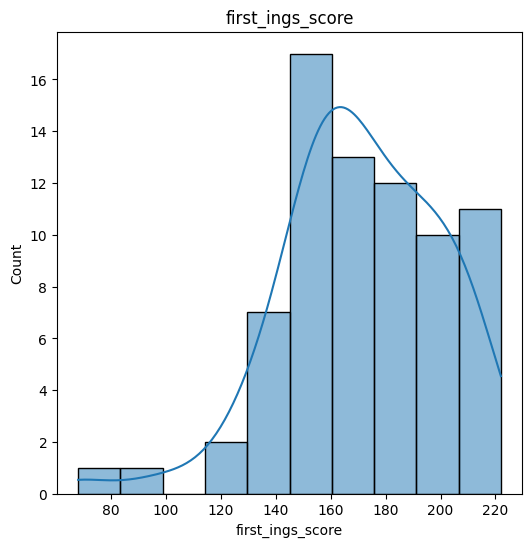

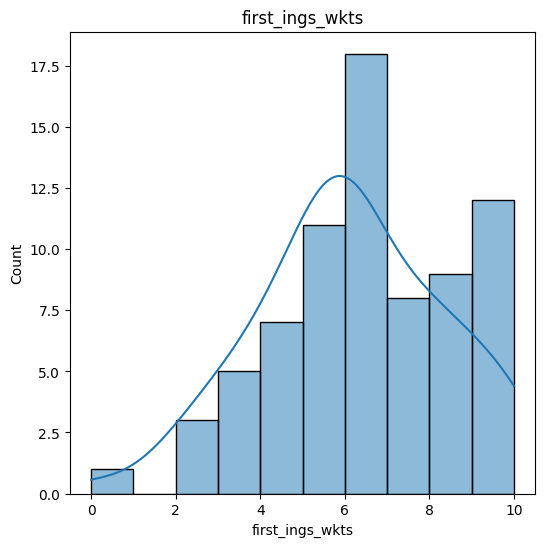

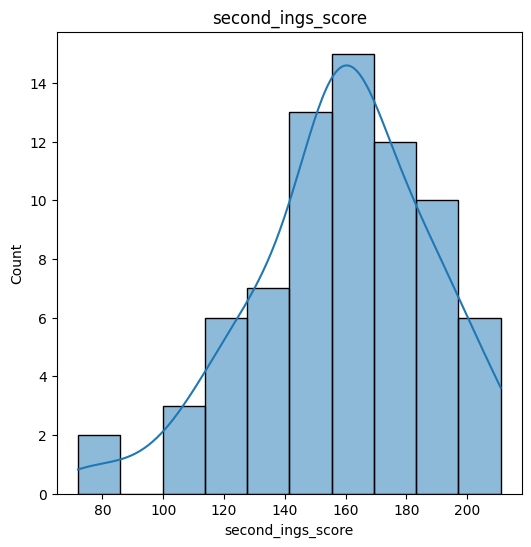

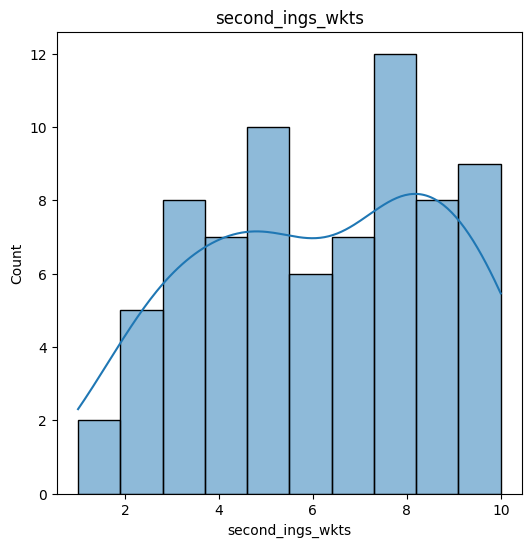

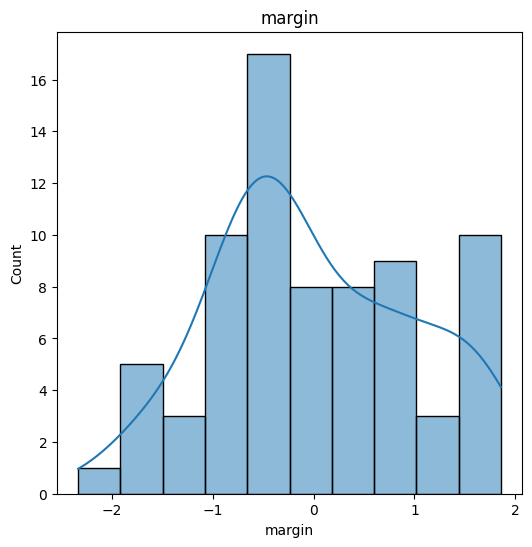

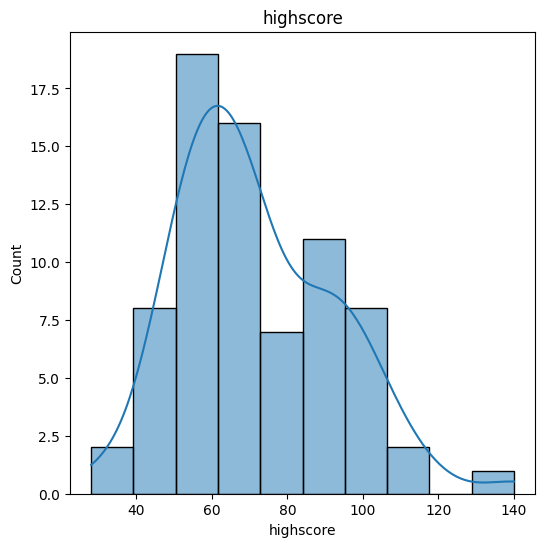

In [10]:
for col in num_cols:
    plt.figure(figsize =(6,6))
    snb.histplot(df[col],bins=10,kde=True)
    plt.title(f"{col}")
    plt.show()

In [11]:
scalar = MinMaxScaler()
df[num_cols] = scalar.fit_transform(df[num_cols])

In [12]:
scalar = MinMaxScaler()
df[num_cols] = scalar.fit_transform(df[num_cols])

In [22]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = len(df[ (df[col] < lower_bound) | (df[col]  > upper_bound) ])


outliers
for col in num_cols:
    print(f"Column: {col} : Percentage: {outliers[col]/df.shape[0] * 100}")



Column: first_ings_score : Percentage: 1.3513513513513513
Column: first_ings_wkts : Percentage: 1.3513513513513513
Column: second_ings_score : Percentage: 2.7027027027027026
Column: second_ings_wkts : Percentage: 0.0
Column: margin : Percentage: 0.0
Column: highscore : Percentage: 1.3513513513513513


In [23]:
df[obj_cols]

,date,venue,team1,team2,stage,toss_winner,toss_decision,match_winner,won_by,player_of_the_match,top_scorer,best_bowling,best_bowling_figure
0,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,Kolkata,Wickets,Umesh Yadav,MS Dhoni,Dwayne Bravo,3--20
1,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,Delhi,Wickets,Kuldeep Yadav,Ishan Kishan,Kuldeep Yadav,3--18
2,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,Punjab,Wickets,Odean Smith,Faf du Plessis,Mohammed Siraj,2--59
3,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,Gujarat,Wickets,Mohammed Shami,Deepak Hooda,Mohammed Shami,3--25
4,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,Rajasthan,Runs,Sanju Samson,Aiden Markram,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,Punjab,Wickets,Harpreet Brar,Liam Livingstone,Harpreet Brar,3--26
70,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,Gujarat,Wickets,David Miller,Jos Buttler,Hardik Pandya,1--14
71,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,Banglore,Runs,Rajat Patidar,Rajat Patidar,Josh Hazlewood,3--43
72,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,Rajasthan,Wickets,Jos Buttler,Jos Buttler,Prasidh Krishna,3--22
